In [1]:
import os

import matplotlib.pyplot as plt
import netCDF4 as nc4
import numpy as np

from pysgrid import from_nc_file
from pysgrid.processing_2d import avg_to_cell_center, rotate_vectors, vector_sum

In [2]:
DATASET_URL = 'http://geoport.whoi.edu/thredds/dodsC/coawst_4/use/fmrc/coawst_4_use_best.ncd'
TIME_INDEX = -1
VERTICAL_INDEX = 0
SUB = 1
SCALE = 0.06
%matplotlib inline

In [3]:
os.environ['TCL_LIBRARY'] = 'C:/Python279/tcl/tcl8.5'
os.environ['TK_LIBRARY'] = 'C:/Python279/tcl/tk8.5'

In [4]:
s = from_nc_file(DATASET_URL)
ds = nc4.Dataset(DATASET_URL)

In [5]:
u_var = s.u
v_var = s.v
u_velocity = ds.variables['u']
v_velocity = ds.variables['v']

In [6]:
u_data = u_velocity[TIME_INDEX, VERTICAL_INDEX, u_var.center_slicing[2], u_var.center_slicing[3]]
v_data = v_velocity[TIME_INDEX, VERTICAL_INDEX, v_var.center_slicing[2], v_var.center_slicing[3]]

In [7]:
u_avg = avg_to_cell_center(u_data, u_var.center_axis)
v_avg = avg_to_cell_center(v_data, v_var.center_axis)

In [8]:
angle_var = s.angle
angle = ds.variables['angle']

In [9]:
angle_data = angle[angle_var.center_slicing]

In [10]:
u_rot, v_rot = rotate_vectors(u_avg, v_avg, angle_data)

In [11]:
uv_vector_sum = vector_sum(u_rot, v_rot)

In [12]:
cell_centers = s.centers
lon_var = s.lon_rho
lat_var = s.lat_rho
longitude = cell_centers[:, :, 0]
latitude = cell_centers[:, :, 1]
longitude_subset = longitude[lon_var.center_slicing]
latitude_subset = latitude[lat_var.center_slicing]

D:\virtualenv\ipynb_env\lib\site-packages\matplotlib\axes\_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
D:\virtualenv\ipynb_env\lib\site-packages\matplotlib\axes\_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


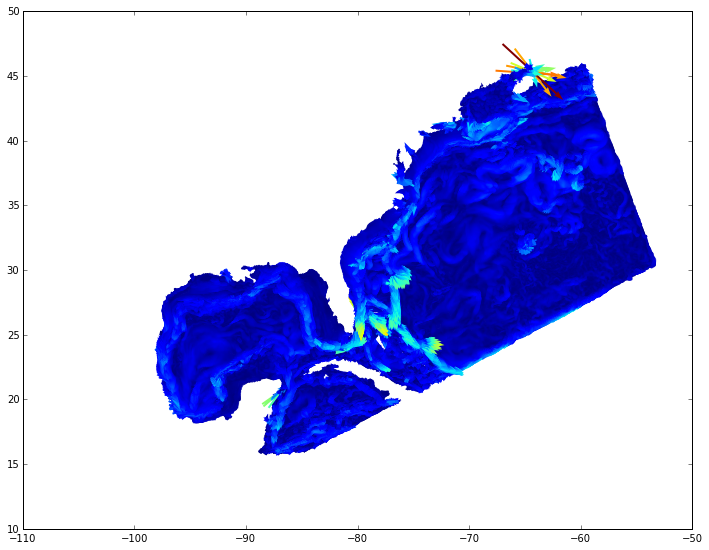

In [13]:
fig = plt.figure(figsize=(12, 12))
plt.subplot(111, aspect=(1.0/np.cos(np.mean(latitude_subset)*np.pi/180.0)))
q = plt.quiver(longitude_subset[::SUB, ::SUB], 
               latitude_subset[::SUB, ::SUB], 
               u_rot[::SUB, ::SUB], 
               v_rot[::SUB, ::SUB],
               uv_vector_sum[::SUB, ::SUB],
               scale=1.0/SCALE, 
               pivot='middle', 
               zorder=1e35, 
               width=0.003
              )